In [1]:
!pip install nltk
!pip install wordcloud
!pip install spacy
!pip install eng-spacysentiment
!pip install textblob
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.5 MB/s eta 0:00:00
  Created wheel for eng-spacysentiment: filename=eng_spacysentiment-2.3.0-py3-none-any.whl size=1342134 sha256=dcca07cc29b306b98dfa50d578a9bde034749d81bad67077f0fe2e51fa3411a5
  Stored in directory: /root/.cache/pip/wheels/c7/85/4a/f6db06d341f4006864e5fa940b473acb2987c8e0111f8a4642
Successfully built eng-spacysentiment
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
  

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk import download
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import numpy as np

In [5]:
from nltk import Text as nltk_text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import eng_spacysentiment

nlp = spacy.load('en_core_web_sm')

from textblob import TextBlob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from pymystem3 import Mystem

In [7]:
from pprint import pprint

*Лемматизация через WordNetLemmatizer и pymorphy2 оказались менее удачной, остановилась на spacy*

In [8]:
new_stopwords = ['AI','intelligence', 'mit', 'MIT', 'robots', 'machine', 'learning', 'computer', 'model', 'datum', 'make','say', 'use',
                 'one', 'system', 'work', 'technology', 'take', 'news', 'fox', 'n', 'making', 'ai', 'artificial','robot','robotic','q',
                 'says','could', 'models','data', 'may', 'using','computing']

In [9]:
stop_words = stopwords.words('english')

In [10]:
stop_words = set(stop_words)

In [11]:
super_stop_words = stop_words.union(new_stopwords)

In [12]:
def clean_text(text_str, super_stop_words):
  text_str = text_str.lower()
  text_list_nltk = word_tokenize(text_str)
  text_clean = [word for word in text_list_nltk if word not in super_stop_words and word[0].isalpha()]
  return text_clean

**Анализ заголовков статей MIT**

In [13]:
with open('m_headers.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [14]:
full_m_headers_text = clean_text(text, super_stop_words)
print(full_m_headers_text[:100])

['headers', 'mit-takeda', 'program', 'wraps', 'publications', 'patent', 'nearly', 'two', 'dozen', 'projects', 'completed', 'researchers', 'leverage', 'shadows', 'scenes', 'including', 'objects', 'blocked', 'view', 'understanding', 'visual', 'knowledge', 'language', 'smarter', 'way', 'streamline', 'drug', 'discovery', 'technique', 'improves', 'reasoning', 'capabilities', 'large', 'language', 'creation', 'story', 'told', 'immersive', 'symposium', 'highlights', 'scale', 'mental', 'health', 'crisis', 'novel', 'methods', 'diagnosis', 'treatment', 'researchers', 'large', 'language', 'help', 'navigate', 'climate', 'relevant', 'local', 'decision-makers', 'new', 'algorithm', 'discovers', 'language', 'watching', 'videos', 'new', 'vision', 'method', 'helps', 'speed', 'screening', 'electronic', 'materials', 'data-driven', 'approach', 'better', 'choices', 'mouth-based', 'touchpad', 'enables', 'people', 'living', 'paralysis', 'interact', 'computers', 'technique', 'effective', 'multipurpose', 'lookin

In [15]:
spacy_token_mh = []
for i in full_m_headers_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_mh.append(' '.join(sent))

In [16]:
spacy_token_mh

['header',
 'mit takeda',
 'program',
 'wrap',
 'publication',
 'patent',
 'nearly',
 'two',
 'dozen',
 'project',
 'complete',
 'researcher',
 'leverage',
 'shadow',
 'scene',
 'include',
 'object',
 'block',
 'view',
 'understand',
 'visual',
 'knowledge',
 'language',
 'smart',
 'way',
 'streamline',
 'drug',
 'discovery',
 'technique',
 'improve',
 'reason',
 'capability',
 'large',
 'language',
 'creation',
 'story',
 'tell',
 'immersive',
 'symposium',
 'highlight',
 'scale',
 'mental',
 'health',
 'crisis',
 'novel',
 'method',
 'diagnosis',
 'treatment',
 'researcher',
 'large',
 'language',
 'help',
 'navigate',
 'climate',
 'relevant',
 'local',
 'decision maker',
 'new',
 'algorithm',
 'discover',
 'language',
 'watch',
 'video',
 'new',
 'vision',
 'method',
 'help',
 'speed',
 'screen',
 'electronic',
 'material',
 'data drive',
 'approach',
 'well',
 'choice',
 'mouth base',
 'touchpad',
 'enable',
 'people',
 'live',
 'paralysis',
 'interact',
 'computer',
 'technique',


In [17]:
len(spacy_token_mh)

5797

**Подсчёт наиболее частотных слов, биграмм, построение облака слов**

In [18]:
from collections import Counter
Counter(spacy_token_mh).most_common(50)

[('new', 100),
 ('help', 61),
 ('future', 43),
 ('human', 39),
 ('language', 33),
 ('researcher', 32),
 ('student', 31),
 ('build', 31),
 ('well', 30),
 ('health', 29),
 ('question', 29),
 ('research', 29),
 ('brain', 26),
 ('design', 25),
 ('way', 24),
 ('network', 24),
 ('image', 23),
 ('name', 23),
 ('world', 23),
 ('science', 23),
 ('neural', 22),
 ('teach', 21),
 ('college', 21),
 ('algorithm', 20),
 ('deep', 20),
 ('award', 20),
 ('like', 20),
 ('lab', 20),
 ('object', 19),
 ('improve', 19),
 ('material', 19),
 ('find', 19),
 ('generative', 19),
 ('system', 19),
 ('learn', 19),
 ('machine learning', 19),
 ('smart', 18),
 ('speed', 18),
 ('team', 18),
 ('challenge', 18),
 ('predict', 18),
 ('technique', 17),
 ('advance', 17),
 ('program', 16),
 ('drug', 16),
 ('vision', 16),
 ('explore', 16),
 ('fast', 16),
 ('study', 16),
 ('develop', 16)]

In [19]:
frequencies_list = nltk.FreqDist(spacy_token_mh)

word_freq = dict((word, freq) for word, freq in frequencies_list.items() if not word.isdigit())

print(word_freq)

frequencies_list.most_common(50)

{'header': 1, 'mit takeda': 3, 'program': 16, 'wrap': 1, 'publication': 1, 'patent': 1, 'nearly': 2, 'two': 5, 'dozen': 1, 'project': 7, 'complete': 1, 'researcher': 32, 'leverage': 5, 'shadow': 1, 'scene': 3, 'include': 2, 'object': 19, 'block': 2, 'view': 3, 'understand': 12, 'visual': 5, 'knowledge': 4, 'language': 33, 'smart': 18, 'way': 24, 'streamline': 3, 'drug': 16, 'discovery': 8, 'technique': 17, 'improve': 19, 'reason': 9, 'capability': 1, 'large': 11, 'creation': 2, 'story': 1, 'tell': 6, 'immersive': 1, 'symposium': 2, 'highlight': 2, 'scale': 5, 'mental': 3, 'health': 29, 'crisis': 1, 'novel': 8, 'method': 14, 'diagnosis': 2, 'treatment': 5, 'help': 61, 'navigate': 3, 'climate': 6, 'relevant': 1, 'local': 3, 'decision maker': 1, 'new': 100, 'algorithm': 20, 'discover': 5, 'watch': 4, 'video': 13, 'vision': 16, 'speed': 18, 'screen': 3, 'electronic': 2, 'material': 19, 'data drive': 3, 'approach': 7, 'well': 30, 'choice': 2, 'mouth base': 1, 'touchpad': 1, 'enable': 10, 'p

[('new', 100),
 ('help', 61),
 ('future', 43),
 ('human', 39),
 ('language', 33),
 ('researcher', 32),
 ('student', 31),
 ('build', 31),
 ('well', 30),
 ('health', 29),
 ('question', 29),
 ('research', 29),
 ('brain', 26),
 ('design', 25),
 ('way', 24),
 ('network', 24),
 ('image', 23),
 ('name', 23),
 ('world', 23),
 ('science', 23),
 ('neural', 22),
 ('teach', 21),
 ('college', 21),
 ('algorithm', 20),
 ('deep', 20),
 ('award', 20),
 ('like', 20),
 ('lab', 20),
 ('object', 19),
 ('improve', 19),
 ('material', 19),
 ('find', 19),
 ('generative', 19),
 ('system', 19),
 ('learn', 19),
 ('machine learning', 19),
 ('smart', 18),
 ('speed', 18),
 ('team', 18),
 ('challenge', 18),
 ('predict', 18),
 ('technique', 17),
 ('advance', 17),
 ('program', 16),
 ('drug', 16),
 ('vision', 16),
 ('explore', 16),
 ('fast', 16),
 ('study', 16),
 ('develop', 16)]

**График наиболее частотных слов**

In [20]:
def plot_word_frequency(words,top_n=10):
    word_freq = nltk.FreqDist(spacy_token_mh)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(50, 5))
    plt.title("Самые частые слова в корпусе")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(x=labels, y=counts)
    return plot

<Axes: title={'center': 'Самые частые слова в корпусе'}, xlabel='Word', ylabel='Count'>

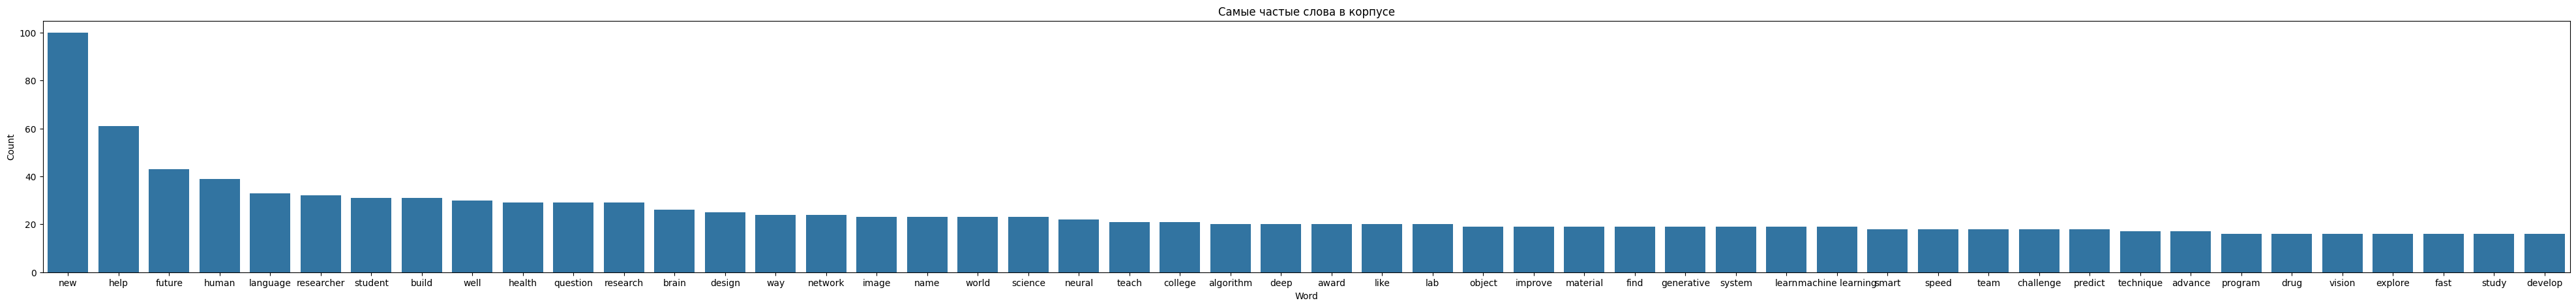

In [21]:
plot_word_frequency(spacy_token_mh,50)

**Облако слов**

In [22]:
from wordcloud import WordCloud
%matplotlib inline

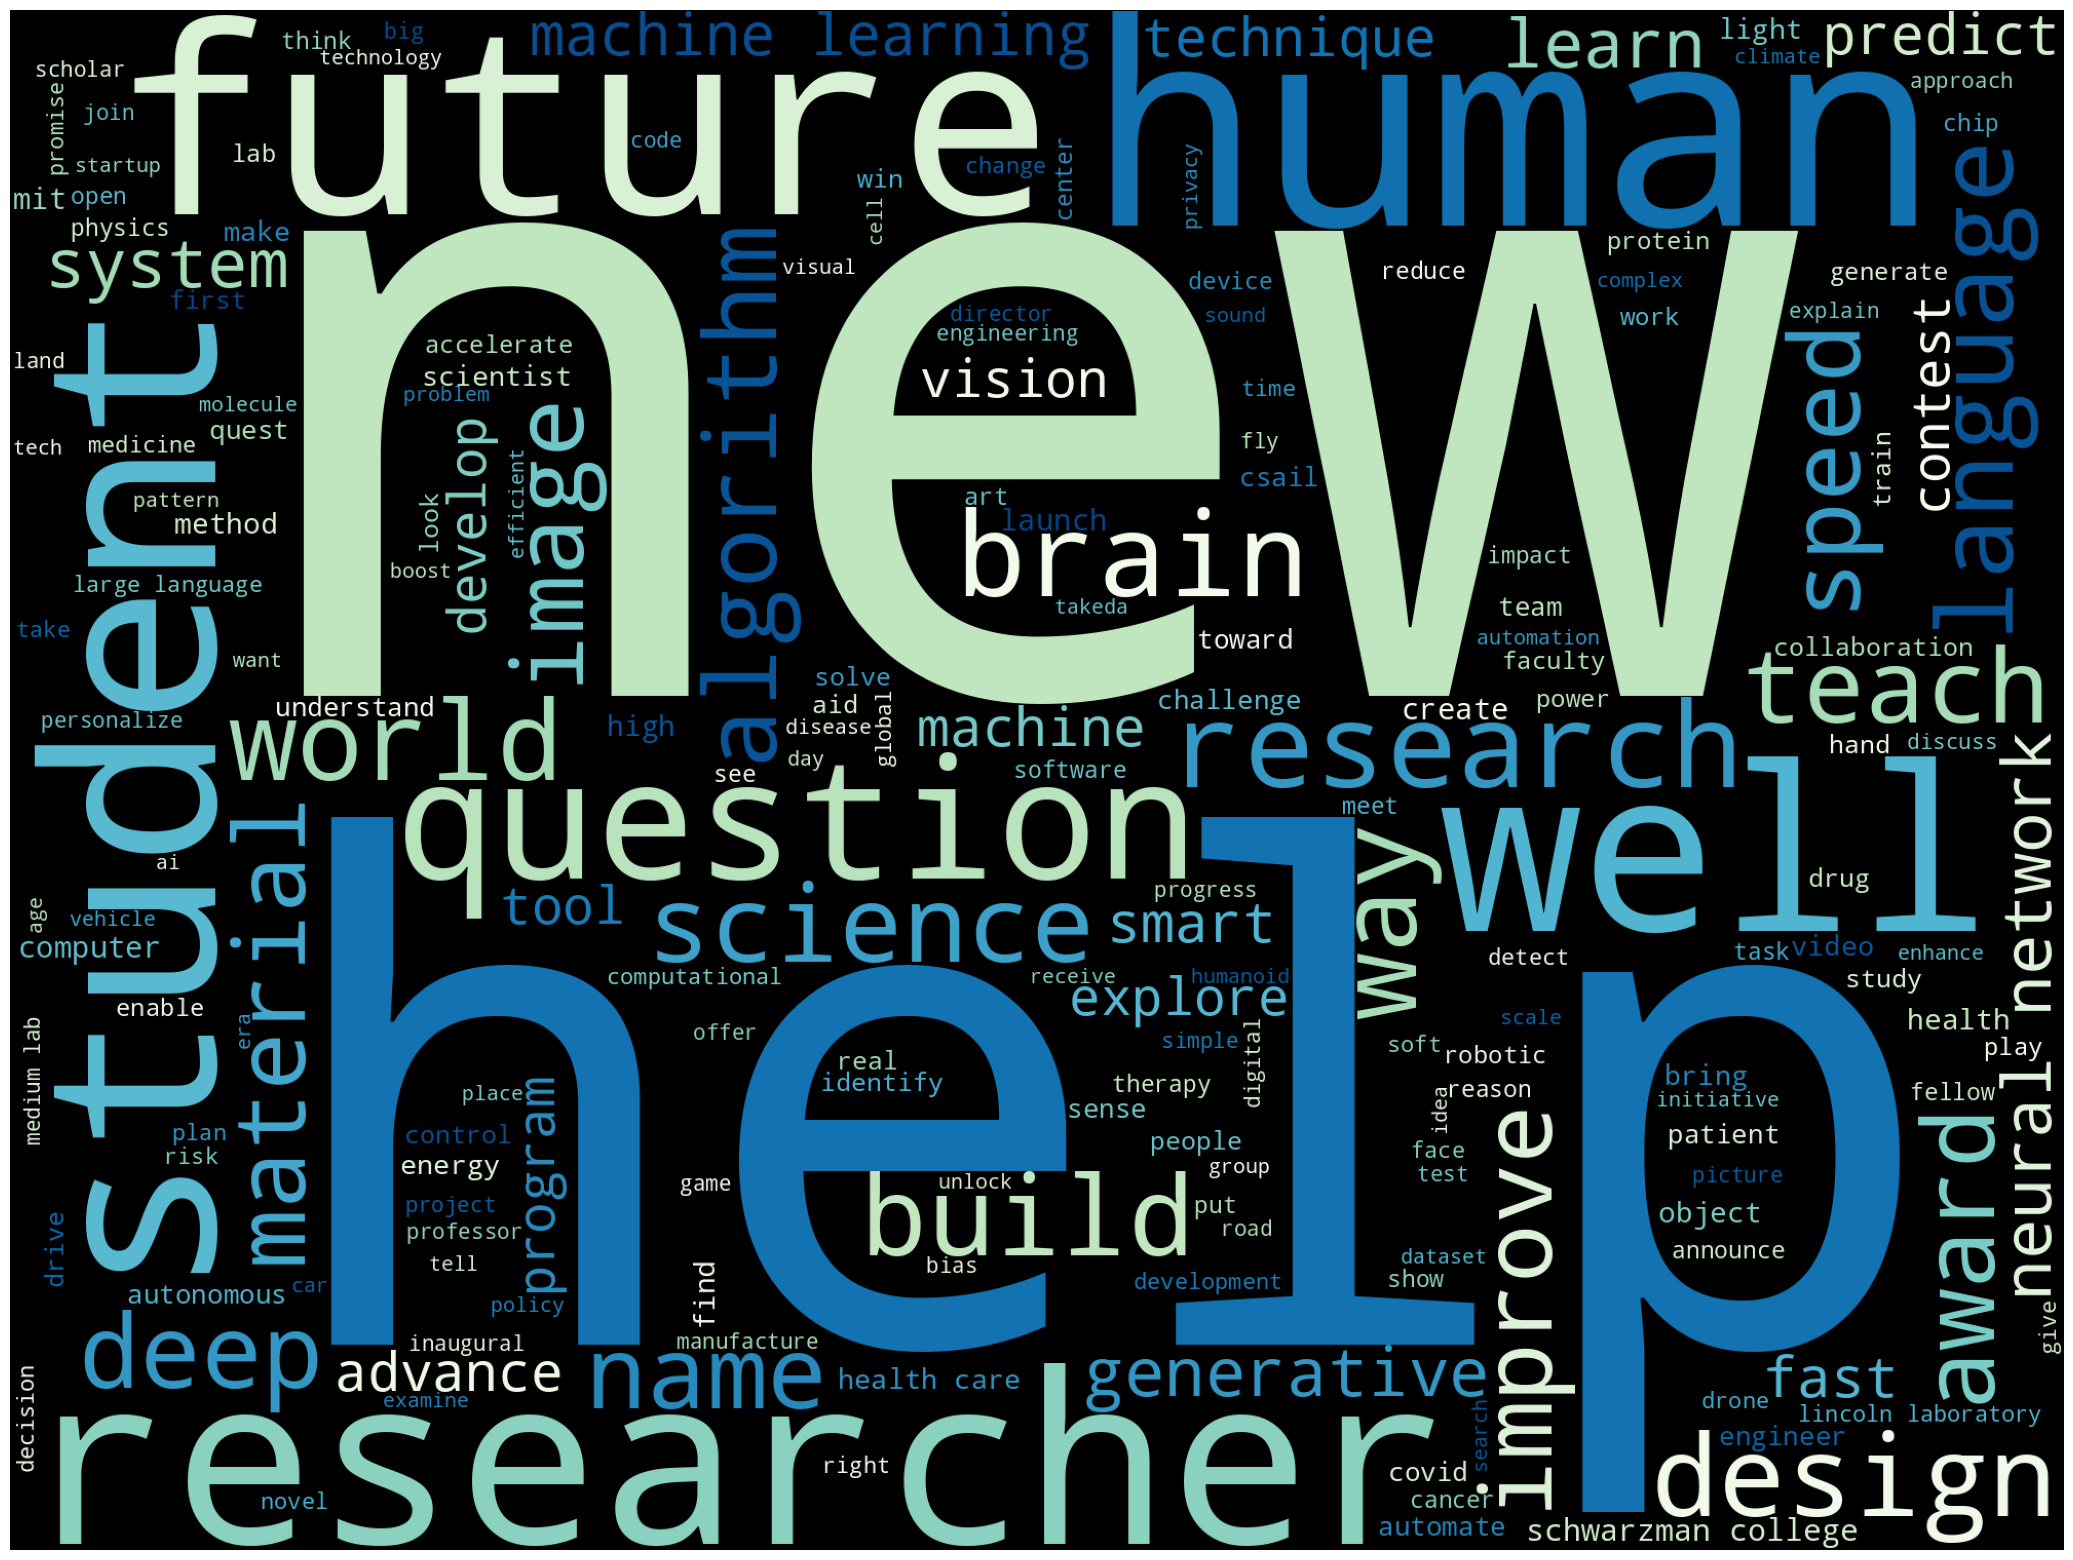

In [23]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='GnBu').generate(', '.join(spacy_token_mh))
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Биграммы**

In [24]:
freq_bigramms = Counter(nltk.bigrams(spacy_token_mh))
freq_bigramms.most_common(10)

[(('neural', 'network'), 19),
 (('schwarzman', 'college'), 16),
 (('health', 'care'), 12),
 (('large', 'language'), 8),
 (('lincoln', 'laboratory'), 8),
 (('like', 'human'), 8),
 (('medium', 'lab'), 7),
 (('drug', 'discovery'), 6),
 (('global', 'challenge'), 6),
 (('team', 'build'), 6)]

In [25]:
freq_bigramms = Counter(nltk.bigrams(full_m_headers_text))
freq_bigramms.most_common(10)

[(('schwarzman', 'college'), 16),
 (('neural', 'networks'), 15),
 (('health', 'care'), 12),
 (('large', 'language'), 8),
 (('lincoln', 'laboratory'), 8),
 (('media', 'lab'), 7),
 (('drug', 'discovery'), 6),
 (('like', 'humans'), 6),
 (('global', 'challenges'), 6),
 (('study', 'finds'), 5)]

**Выявление коллокаций (PMI, log-likelihood, tf-idf)**

In [26]:
def sentenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

def normalize(text):
    doc = nlp(text)
    list_of_lemmas = ' '.join([tok.lemma_ for tok in doc])
    tokens = re.findall('[a-zA-Z0-9]+', list_of_lemmas.lower())
    normalized_text = [word for word in tokens if len(word) > 2 and word not in super_stop_words]

    return normalized_text

def preprocess(text):
    sents = sentenize(text)
    return [normalize(sent) for sent in sents]

# сделала другую предобработку, так как нужно разделение на предложения

In [27]:
with open('m_headers.txt', encoding='utf-8') as text:
    corpus = text.read()

In [28]:
corpus = preprocess(corpus)

In [29]:
corpus

[['header',
  'takeda',
  'program',
  'wrap',
  'publication',
  'patent',
  'nearly',
  'two',
  'dozen',
  'project',
  'complete',
  'researchers',
  'leverage',
  'shadow',
  'scene',
  'include',
  'object',
  'block',
  'view',
  'understand',
  'visual',
  'knowledge',
  'language',
  'smart',
  'way',
  'streamline',
  'drug',
  'discovery',
  'technique',
  'improve',
  'reasoning',
  'capability',
  'large',
  'language',
  'creation',
  'story',
  'tell',
  'immersive',
  'symposium',
  'highlight',
  'scale',
  'mental',
  'health',
  'crisis',
  'novel',
  'method',
  'diagnosis',
  'treatment'],
 ['researcher',
  'large',
  'language',
  'help',
  'navigate',
  'climate',
  'relevant',
  'local',
  'decision',
  'maker',
  'new',
  'algorithm',
  'discover',
  'language',
  'watch',
  'video',
  'new',
  'vision',
  'method',
  'help',
  'speed',
  'screening',
  'electronic',
  'material',
  'drive',
  'approach',
  'well',
  'choice',
  'mouth',
  'base',
  'touchpad',

In [30]:
def ngrammer(tokens, stops, n=2):
    ngrams = []
    tokens = [token for token in tokens if token not in super_stop_words]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

In [31]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))

    except ZeroDivisionError:
        return 0

    return score

def collect_stats(corpus, stops):

    unigrams = Counter()
    bigrams = Counter()

    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, super_stop_words, 2))

    return unigrams, bigrams

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=1):
    bigram2score = Counter()
    len_vocab = len(unigrams)
    for bigram in bigrams:
        score = scorer(unigrams[bigram[0]], unigrams[bigram[1]],
                       bigrams[bigram], len_vocab, min_count)

        if score > threshold:
            bigram2score[bigram] = score

    return bigram2score

In [32]:
unigrams, bigrams = collect_stats(corpus, super_stop_words)

In [33]:
bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)
bigram2score
bigram2score.most_common(20)

[(('wrap', 'publication'), 0.5),
 (('publication', 'patent'), 0.5),
 (('complete', 'researchers'), 0.5),
 (('paralysis', 'interact'), 0.5),
 (('democratize', 'possibility'), 0.5),
 (('ovarian', 'tumor'), 0.5),
 (('sally', 'kornbluth'), 0.5),
 (('kornbluth', 'openai'), 0.5),
 (('sam', 'altman'), 0.5),
 (('aeronautics', 'astronautics'), 0.5),
 (('mile', 'logistic'), 0.5),
 (('extract', 'hydrogen'), 0.5),
 (('hydrogen', 'rock'), 0.5),
 (('sleeper', 'bacteria'), 0.5),
 (('hurt', 'employment'), 0.5),
 (('forecast', 'frequency'), 0.5),
 (('mechanism', 'retrieve'), 0.5),
 (('retrieve', 'store'), 0.5),
 (('deal', 'limitation'), 0.5),
 (('limitation', 'noisy'), 0.5)]

In [34]:
from collections import defaultdict
def get_window_stats(texts, window=4):

    bigrams = defaultdict(list)

    for text in texts:
        for i in range(len(text)-window):
            words = list(enumerate(text[i:i+window]))
            target = words[0][1]
            for j, word in words[1:]:
                bigrams[(target, word)].append(j)

    bigrams_stds = Counter()
    for bigram in bigrams:
        if len(bigrams[bigram]) > 2:
            bigrams_stds[bigram] = np.std(bigrams[bigram])

    return bigrams_stds

In [35]:
get_window_stats(corpus)

Counter({('takeda', 'program'): 0.0,
         ('way', 'drug'): 0.4714045207910317,
         ('drug', 'discovery'): 0.0,
         ('technique', 'improve'): 0.0,
         ('large', 'language'): 0.0,
         ('mental', 'health'): 0.0,
         ('language', 'help'): 0.9428090415820634,
         ('new', 'algorithm'): 0.4,
         ('new', 'language'): 0.4714045207910317,
         ('new', 'method'): 0.4330127018922193,
         ('new', 'help'): 0.4898979485566356,
         ('method', 'speed'): 0.4714045207910317,
         ('material', 'property'): 0.9428090415820634,
         ('school', 'engineering'): 0.0,
         ('school', 'welcome'): 0.0,
         ('engineering', 'welcome'): 0.0,
         ('engineering', 'new'): 0.0,
         ('new', 'collaboration'): 0.9428090415820634,
         ('2024', 'fellows'): 0.4714045207910317,
         ('well', 'way'): 0.0,
         ('discuss', 'future'): 0.82915619758885,
         ('future', 'create'): 0.816496580927726,
         ('learn', 'name'): 0.0,
    

In [36]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

In [37]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [38]:
finder = BigramCollocationFinder.from_documents(corpus)

In [39]:
finder.nbest(bigram_measures.likelihood_ratio, 20)

[('neural', 'network'),
 ('schwarzman', 'college'),
 ('health', 'care'),
 ('lincoln', 'laboratory'),
 ('black', 'box'),
 ('large', 'language'),
 ('seed', 'grant'),
 ('drug', 'discovery'),
 ('stephen', 'schwarzman'),
 ('solar', 'cell'),
 ('self', 'drive'),
 ('object', 'recognition'),
 ('global', 'challenge'),
 ('media', 'lab'),
 ('president', 'reif'),
 ('virtual', 'reality'),
 ('blind', 'spot'),
 ('carbon', 'footprint'),
 ('cynthia', 'breazeal'),
 ('dan', 'huttenlocher')]

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
texts = [' '.join(sent) for sent in corpus]

In [42]:
tfidf = TfidfVectorizer(min_df=2, max_df=50, max_features=1000,
                       ngram_range=(2,2))

In [43]:
tfidf.fit(texts)

TfidfVectorizer(max_df=50, max_features=1000, min_df=2, ngram_range=(2, 2))

In [44]:
tfidf.vocabulary_

{'takeda program': 212,
 'smart way': 195,
 'drug discovery': 57,
 'technique improve': 218,
 'large language': 104,
 'mental health': 126,
 'diagnosis treatment': 51,
 'language help': 102,
 'help navigate': 83,
 'decision maker': 46,
 'new algorithm': 138,
 'watch video': 229,
 'new vision': 150,
 'base method': 16,
 'method find': 127,
 'material property': 120,
 'school engineering': 185,
 'engineering welcome': 60,
 'welcome new': 231,
 'new faculty': 141,
 'improve reliability': 96,
 'well way': 233,
 'shape shift': 193,
 'discuss future': 53,
 'programming language': 164,
 'mechanical engineering': 121,
 'julie shah': 99,
 'build well': 29,
 'new method': 143,
 'medical image': 124,
 'fast well': 65,
 'seed grant': 190,
 'award scholar': 13,
 'common sense': 37,
 'time fast': 221,
 'high resolution': 86,
 'faculty member': 64,
 'peripheral vision': 156,
 'light speed': 112,
 'shape future': 192,
 'future age': 73,
 'name 2024': 131,
 'scholars new': 184,
 'put hand': 168,
 'prob

**Выделение прилагательных и наречий**

In [45]:
from nltk import pos_tag

In [46]:
with open('m_headers.txt', 'r', encoding='utf-8') as file:
        text = file.read()

In [47]:
words = word_tokenize(text)

pos_tagged = pos_tag(words)

adjectives = [word for (word, pos) in pos_tagged if pos in ['JJ', 'JJR', 'JJS']]

In [50]:
pprint(Counter(adjectives).most_common(50))

[('artificial', 90),
 ('new', 68),
 ('robotic', 20),
 ('human', 20),
 ('better', 19),
 ('neural', 18),
 ('generative', 14),
 ('deep', 14),
 ('machine-learning', 13),
 ('global', 12),
 ('“', 11),
 ('Artificial', 11),
 ('autonomous', 10),
 ('medical', 9),
 ('more', 9),
 ('large', 7),
 ('high', 7),
 ('digital', 7),
 ('’', 7),
 ('soft', 6),
 ('smart', 6),
 ('virtual', 6),
 ('real', 6),
 ('Robotic', 6),
 ('novel', 5),
 ('complex', 5),
 ('efficient', 5),
 ('powerful', 5),
 ('inaugural', 5),
 ('social', 5),
 ('right', 5),
 ('future', 5),
 ('black', 5),
 ('light', 5),
 ('clinical', 5),
 ('”', 5),
 ('visual', 4),
 ('AI-based', 4),
 ('simple', 4),
 ('other', 4),
 ('computational', 4),
 ('human-robot', 4),
 ('less', 4),
 ('national', 4),
 ('ethical', 4),
 ('many', 4),
 ('surgical', 4),
 ('good', 4),
 ('solar', 4),
 ('object', 4)]


In [49]:
adverbs = [word for (word, pos) in pos_tagged if pos in ['RB', 'RBR', 'RBS']]

In [51]:
pprint(Counter(adverbs).most_common(50))

[('more', 30),
 ('faster', 8),
 ('just', 5),
 ('together', 4),
 ('efficiently', 4),
 ('first', 4),
 ('well', 4),
 ('up', 4),
 ('not', 3),
 ('nearly', 2),
 ('so', 2),
 ('as', 2),
 ('newly', 2),
 ('better', 2),
 ('automatically', 2),
 ('ever', 2),
 ('ahead', 2),
 ('even', 2),
 ('really', 2),
 ('most', 2),
 ('everywhere', 2),
 ('autonomously', 2),
 ('surprisingly', 1),
 ('enhance', 1),
 ('progress', 1),
 ('almost', 1),
 ('about', 1),
 ('transparently', 1),
 ('remotely', 1),
 ('biologically', 1),
 ('cautiously', 1),
 ('only', 1),
 ('accurately', 1),
 ('optimally', 1),
 ('responsibly', 1),
 ('positively', 1),
 ('decipher', 1),
 ('practically', 1),
 ('critically', 1),
 ('outcomes', 1),
 ('More', 1),
 ('rapidly', 1),
 ('safely', 1),
 ('fully', 1),
 ('explore', 1),
 ('Faster', 1),
 ('closely', 1),
 ('deep', 1),
 ('pathway', 1),
 ('award', 1)]


**Анализ тональности**

In [52]:
with open('m_headers.txt', 'r', encoding='utf-8') as f:
  text = f.read()

text = text.split('\n')
text

['headers',
 'MIT-Takeda Program wraps up with 16 publications, a patent, and nearly two dozen projects completed',
 'Researchers leverage shadows to model 3D scenes, including objects blocked from view',
 'Understanding the visual knowledge of language models',
 'A smarter way to streamline drug discovery',
 'Technique improves the reasoning capabilities of large language models',
 'A creation story told through immersive technology',
 'Symposium highlights scale of mental health crisis and novel methods of diagnosis and treatment',
 'Researchers use large language models to help robots navigate',
 'Making climate models relevant for local decision-makers',
 'New algorithm discovers language just by watching videos',
 'New computer vision method helps speed up screening of electronic materials',
 'A data-driven approach to making better choices',
 'Mouth-based touchpad enables people living with paralysis to interact with computers',
 'A technique for more effective multipurpose robot

In [53]:
def get_clean_tokens(text):
  text = text.lower()
  text_tokens = word_tokenize(text)
  clean_tokens = []
  for i in text_tokens:
    if i[0].isalpha() and i not in stop_words:
      clean_tokens.append(i)
  return clean_tokens

clean_text = []
for i in text:
  sent = get_clean_tokens(i)
  clean_text.append(' '.join(sent))
clean_text

['headers',
 'mit-takeda program wraps publications patent nearly two dozen projects completed',
 'researchers leverage shadows model scenes including objects blocked view',
 'understanding visual knowledge language models',
 'smarter way streamline drug discovery',
 'technique improves reasoning capabilities large language models',
 'creation story told immersive technology',
 'symposium highlights scale mental health crisis novel methods diagnosis treatment',
 'researchers use large language models help robots navigate',
 'making climate models relevant local decision-makers',
 'new algorithm discovers language watching videos',
 'new computer vision method helps speed screening electronic materials',
 'data-driven approach making better choices',
 'mouth-based touchpad enables people living paralysis interact computers',
 'technique effective multipurpose robots',
 'looking specific action video ai-based method find',
 'controlled diffusion model change material properties images',


In [54]:
nlp = spacy.load("en_core_web_sm")

spacy_token_mhs = []
for i in clean_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_mhs.append(' '.join(sent))

In [55]:
spacy_token_mhs

['header',
 'mit takeda program wrap publication patent nearly two dozen project complete',
 'researcher leverage shadow model scene include object block view',
 'understand visual knowledge language model',
 'smart way streamline drug discovery',
 'technique improve reasoning capability large language model',
 'creation story tell immersive technology',
 'symposium highlight scale mental health crisis novel method diagnosis treatment',
 'researcher use large language model help robot navigate',
 'make climate model relevant local decision maker',
 'new algorithm discover language watch video',
 'new computer vision method help speed screen electronic material',
 'data drive approach make well choice',
 'mouth base touchpad enable people living paralysis interact computer',
 'technique effective multipurpose robot',
 'look specific action video ai base method find',
 'control diffusion model change material property image',
 'school engineering welcome new faculty',
 'community collabo

In [56]:
df = pd.DataFrame(spacy_token_mhs[1:], columns=['header'])
df

,header
0,mit takeda program wrap publication patent nea...
1,researcher leverage shadow model scene include...
2,understand visual knowledge language model
3,smart way streamline drug discovery
4,technique improve reasoning capability large l...
...,...
1186,robot teach we people learn
1187,micro robot hold promise new surgical technique
1188,robot journey beneath arctic ice
1189,lend hand therapy


**Sentiment analysis с помощью spacy**

In [57]:
nlp = eng_spacysentiment.load()

spacy_pos = []
spacy_neg = []
for i in df.header:
  doc = nlp(i)
  spacy_pos.append(round(doc.cats['positive'], 5))
  spacy_neg.append(round(doc.cats['negative'], 5))

df['spacy_pos'] = spacy_pos
df['spacy_neg'] = spacy_neg
df

,header,spacy_pos,spacy_neg
0,mit takeda program wrap publication patent nea...,0.73438,0.11227
1,researcher leverage shadow model scene include...,0.01623,0.08360
2,understand visual knowledge language model,0.28581,0.05566
3,smart way streamline drug discovery,0.37414,0.14051
4,technique improve reasoning capability large l...,0.75689,0.01384
...,...,...,...
1186,robot teach we people learn,0.29217,0.08511
1187,micro robot hold promise new surgical technique,0.37034,0.03862
1188,robot journey beneath arctic ice,0.31247,0.20459
1189,lend hand therapy,0.78969,0.14199


**Sentiment analysis с помощью Textblob**

In [58]:
blob_polar = []
blob_subj = []
for i in df.header:
  analysis = TextBlob(i).sentiment
  blob_polar.append(round(analysis[0], 5))
  blob_subj.append(round(analysis[1], 5))

df['blob_polar'] = blob_polar
df['blob_subj'] = blob_subj
df

,header,spacy_pos,spacy_neg,blob_polar,blob_subj
0,mit takeda program wrap publication patent nea...,0.73438,0.11227,0.10000,0.40000
1,researcher leverage shadow model scene include...,0.01623,0.08360,0.00000,0.00000
2,understand visual knowledge language model,0.28581,0.05566,0.00000,0.00000
3,smart way streamline drug discovery,0.37414,0.14051,0.21429,0.64286
4,technique improve reasoning capability large l...,0.75689,0.01384,0.21429,0.42857
...,...,...,...,...,...
1186,robot teach we people learn,0.29217,0.08511,0.00000,0.00000
1187,micro robot hold promise new surgical technique,0.37034,0.03862,0.13636,0.45455
1188,robot journey beneath arctic ice,0.31247,0.20459,0.00000,0.00000
1189,lend hand therapy,0.78969,0.14199,0.00000,0.00000
